In [1]:
import sys
import torch
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')
from src._97_gpytorch import LogisticGPVI, PGLikelihood
from src._02_method import LogisticVI

%load_ext autoreload
%autoreload 2

In [22]:
data = pd.read_csv("../data/data_add_std_fillNaNs.csv") 

In [3]:
data.head()

,Unnamed: 0,lon,lat,liq,earthquake,mw,PGV,PGA,elev,slope,...,grp,PGV_std,lnPGV,lnVs30,lnprecip,lndc,lndr,lndcdr,lndw,lnwtd
0,0,139.646476,35.201005,0,chiba1987,6.5,8.143915,0.117716,35.597025,0.018409,...,28,0.973653,2.097271,5.892463,7.451754,0.736514,3.176158,3.257685,0.736514,2.656322
1,1,139.646481,35.200103,0,chiba1987,6.5,8.173274,0.117981,35.307485,0.018545,...,9,0.973638,2.100870,5.894658,7.452077,0.730246,3.179405,3.249347,0.730246,2.666603
2,2,139.646486,35.199202,0,chiba1987,6.5,8.202617,0.118247,35.016904,0.018683,...,40,0.973622,2.104453,5.896863,7.452400,0.723895,3.182640,3.240778,0.723895,2.676705
3,3,139.646496,35.197399,0,chiba1987,6.5,8.261259,0.118778,34.432620,0.018960,...,29,0.973591,2.111577,5.901298,7.453047,0.710938,3.189079,3.222920,0.710938,2.696387
4,4,139.646496,35.197399,0,chiba1987,6.5,8.261259,0.118778,34.432620,0.018960,...,34,0.973591,2.111577,5.901298,7.453047,0.710938,3.189079,3.222920,0.710938,2.696387


In [4]:
data.describe()

,Unnamed: 0,lon,lat,liq,mw,PGV,PGA,elev,slope,Vs30,...,grp,PGV_std,lnPGV,lnVs30,lnprecip,lndc,lndr,lndcdr,lndw,lnwtd
count,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,...,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06,1.809300e+06
mean,9.046495e+05,5.882963e+01,2.857916e+01,2.993699e-01,6.882736e+00,3.091178e+01,2.889916e-01,1.167887e+02,2.410442e-02,3.301224e+02,...,2.550000e+01,5.853359e-01,2.671651e+00,5.723536e+00,6.922352e+00,2.266645e+00,1.263024e+00,2.822209e+00,9.282682e-01,1.525383e+00
std,5.223001e+05,1.228207e+02,2.583719e+01,4.579822e-01,1.064757e+00,2.847600e+01,2.465040e-01,2.630754e+02,3.990973e-02,1.401328e+02,...,1.443087e+01,1.931775e-01,1.782304e+00,3.750783e-01,6.173656e-01,1.575875e+00,7.166096e-01,1.882735e+00,5.906333e-01,1.426635e+00
min,0.000000e+00,-1.238937e+02,-4.378531e+01,0.000000e+00,4.000000e+00,1.000000e-02,2.000000e-04,-8.191775e+01,0.000000e+00,1.800000e+02,...,1.000000e+00,0.000000e+00,-4.605170e+00,5.192957e+00,3.828641e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.523248e+05,-1.185251e+02,3.447867e+01,0.000000e+00,6.600000e+00,1.058888e+01,1.377027e-01,3.894305e+00,2.157532e-03,2.249170e+02,...,1.300000e+01,4.820160e-01,2.359805e+00,5.415731e+00,6.441561e+00,1.098612e+00,6.995147e-01,1.432882e+00,4.739992e-01,2.754931e-01
50%,9.046495e+05,1.359802e+02,3.644432e+01,0.000000e+00,6.900000e+00,2.216809e+01,2.242034e-01,1.395586e+01,6.730945e-03,2.714114e+02,...,2.550000e+01,5.716270e-01,3.098654e+00,5.603636e+00,7.109919e+00,2.141693e+00,1.188219e+00,2.631607e+00,8.618221e-01,9.939929e-01
75%,1.356974e+06,1.403746e+02,3.875581e+01,1.000000e+00,7.600000e+00,4.356606e+01,3.755660e-01,8.361584e+01,2.866565e-02,4.042120e+02,...,3.800000e+01,6.724980e-01,3.774278e+00,6.001939e+00,7.352101e+00,3.220330e+00,1.745169e+00,3.939494e+00,1.332367e+00,2.734575e+00
max,1.809299e+06,1.728013e+02,4.853539e+01,1.000000e+00,9.000000e+00,1.787487e+02,1.684876e+00,4.002174e+03,6.450917e-01,7.600000e+02,...,5.000000e+01,9.897830e-01,5.185981e+00,6.633318e+00,8.213311e+00,7.089344e+00,4.726225e+00,9.348019e+00,3.092916e+00,6.333941e+00


In [23]:
data.groupby("earthquake").count()

,Unnamed: 0,lon,lat,liq,mw,PGV,PGA,elev,slope,Vs30,...,grp,PGV_std,lnPGV,lnVs30,lnprecip,lndc,lndr,lndcdr,lndw,lnwtd
earthquake,,,,,,,,,,,,,,,,,,,,,
chiba1987,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
chichi1999,70750,70750,70750,70750,70750,70750,70750,70750,70750,70750,...,70750,70750,70750,70750,70750,70750,70750,70750,70750,70750
chino2008,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
christchurch2011,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
darfield2010,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
hectormine1999,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
hokkaido1993,87100,87100,87100,87100,87100,87100,87100,87100,87100,87100,...,87100,87100,87100,87100,87100,87100,87100,87100,87100,87100
kobe1995,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
kobe2003,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000


In [5]:
data.shape

(1809300, 36)

In [6]:
data.columns

Index(['Unnamed: 0', 'lon', 'lat', 'liq', 'earthquake', 'mw', 'PGV', 'PGA',
       'elev', 'slope', 'Vs30', 'vs_srtm', 'CTI', 'wtd', 'dc', 'dr', 'dr_2',
       'dw', 'dw_2', 'hwater', 'precip', 'AI', 'ai_cat', 'TPI', 'TRI', 'rough',
       'grp', 'PGV_std', 'lnPGV', 'lnVs30', 'lnprecip', 'lndc', 'lndr',
       'lndcdr', 'lndw', 'lnwtd'],
      dtype='object')

In [5]:
y = dat.liq
X = dat[["PGV", "Vs30", "precip", "dw", "wtd"]]

In [6]:
# train on piedmontA
quake = "lomaprieta1989"
X_train = X[data.earthquake != quake]
y_train = y[data.earthquake != quake]
X_test =  X[data.earthquake == quake]
y_test =  y[data.earthquake == quake]


In [7]:
X_train

,PGV,Vs30,precip,dw,wtd
0,8.143915,362.296530,1722.882251,1.088642,13.243810
1,8.173274,363.092813,1723.439289,1.075592,13.391003
2,8.202617,363.894056,1723.996586,1.062451,13.537111
3,8.261259,365.511418,1725.111962,1.035899,13.826070
4,8.261259,365.511418,1725.111962,1.035899,13.826070
...,...,...,...,...,...
1809295,0.198417,440.725689,1099.798096,0.017625,23.300251
1809296,0.198417,440.725689,1099.798096,0.017625,23.300251
1809297,0.181601,757.223229,1310.172988,1.041364,129.972191
1809298,0.164688,696.456029,1467.292250,1.763407,18.176438


In [8]:
y_train.value_counts()

liq
0    1217650
1     501750
Name: count, dtype: int64

In [9]:
X = torch.tensor(X_train.values, dtype=torch.float)
y = torch.tensor(y_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

In [29]:
1800000 / 1000

1800.0

In [30]:
del X_train, y_train, dat

In [10]:
XX = torch.tensor(X, dtype=torch.double)
yy = torch.tensor(y, dtype=torch.double)

dat = {"y": yy, "X": XX}

/tmp/ipykernel_1556300/2660042552.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  XX = torch.tensor(X, dtype=torch.double)
/tmp/ipykernel_1556300/2660042552.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(y, dtype=torch.double)


In [11]:
f0 = LogisticVI(dat, method=1, n_iter=300, verbose=True, intercept=True)

In [12]:
f0.fit()

Fitting with proposed bound, full covariance variational family
0 919477371.6786472
20 91882829.84877554
40 25809171.75507907
60 15183134.40144499
80 15717277.170792932
100 14304072.03997566
120 12829676.2182999
140 9484458.911974179
160 7501678.7657528035
180 15222506.603705589
200 10300963.077109387
220 12808028.264168572
240 7732738.453204416
260 4936088.276438682
280 3720132.203304156


In [13]:
print(f0.m)
f0.s

tensor([ 1.1962,  0.0293, -0.0252,  0.0018, -1.1344, -0.4917],
       dtype=torch.float64, requires_grad=True)


tensor([0.0616, 0.0351, 0.0228, 0.0032, 0.0728, 0.0140], dtype=torch.float64,
       grad_fn=<SqrtBackward0>)

In [15]:
# save the model f0, this is an object
torch.save(f0, "./f0.pt")

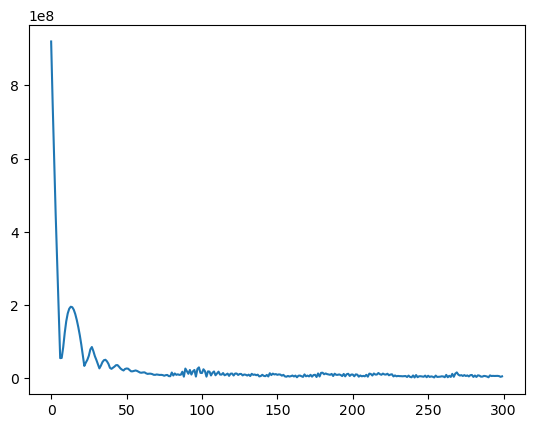

In [16]:
plt.plot(f0.loss)

In [17]:
XX_test= torch.tensor(X_test, dtype=torch.double) 

preds = f0.predict(XX_test)

/tmp/ipykernel_1556300/2900028303.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  XX_test= torch.tensor(X_test, dtype=torch.double)


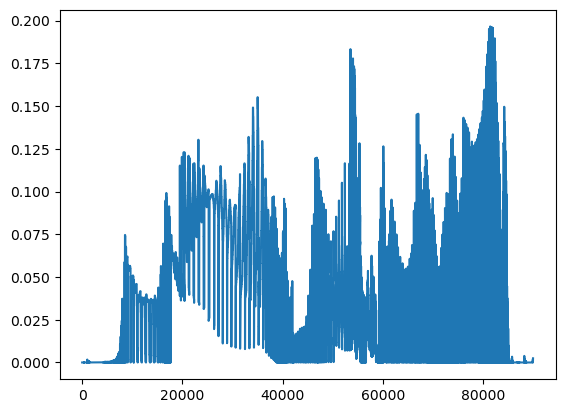

In [18]:
plt.plot(preds.detach().numpy())

In [19]:
from torcheval.metrics import BinaryAUROC

In [20]:
auc = BinaryAUROC()
auc.update(preds, y_test)
auc.compute()

tensor(0.8232, dtype=torch.float64)

In [23]:
quake = "lomaprieta1989"
lomp = data[data.earthquake == quake]

(36.5, 38.0)

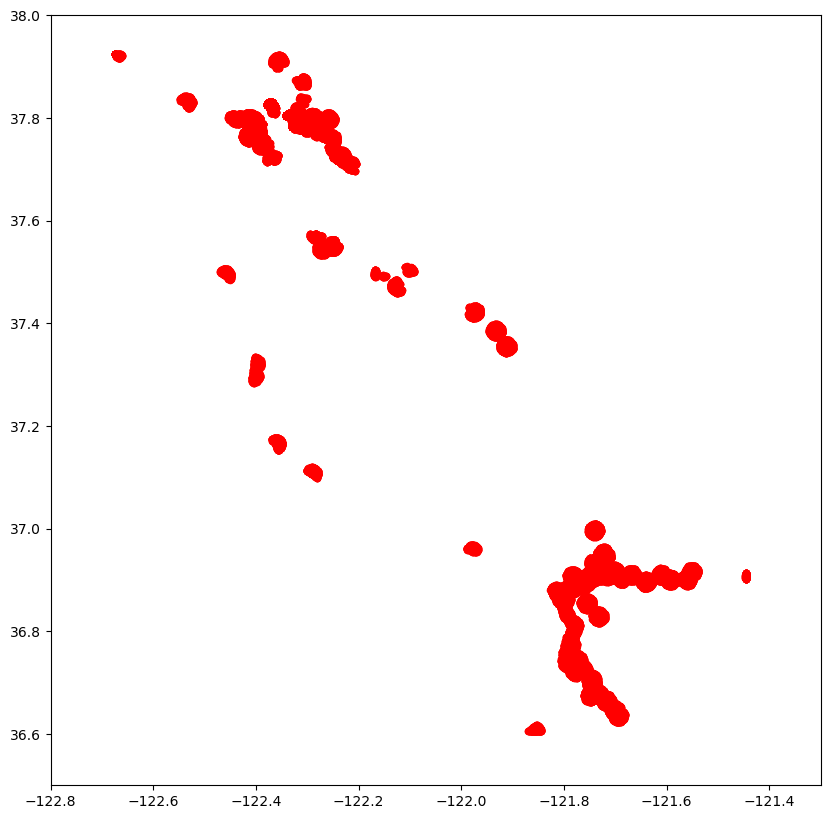

In [45]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(lomp.lon, lomp.lat)]
gdf = gpd.GeoDataFrame(lomp, geometry=geometry)

# read shapefile 
sf = gpd.read_file("../data/cal/CA_Places_TIGER2016.shp")
# sf = gpd.read_file("../data/loma/mi.shp")

# alongside the map we need 
# a dataframe with the coordinates
# of the cities we want to plot
# alongside the map index we also have pga, pgv, psa0p3, psa1p0, psa3p0
# we need to create a geometry column
geometry = [Point(xy) for xy in zip(lomp.lon, lomp.lat)]
gdf = gpd.GeoDataFrame(lomp, geometry=geometry)


fig, ax = plt.subplots(figsize=(10,10))
sf.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize=20)
ax.set_xlim([-122.8, -121.3])
ax.set_ylim([36.5, 38.0])


In [62]:
# export longitude and latitude and preds as csv
# preds = preds.detach().numpy()
# preds = pd.DataFrame(preds)

lomp = lomp.reset_index(drop=True)
out = pd.concat([lomp[["lon", "lat"]], preds], axis=1)

out.columns = ["lon", "lat", "preds"]
out.to_csv("./loma_preds.csv", index=False)

In [63]:
f0.m

tensor([ 1.1962,  0.0293, -0.0252,  0.0018, -1.1344, -0.4917],
       dtype=torch.float64, requires_grad=True)

In [64]:
pgv = gpd.read_file("../data/loma/pgv.shp")

In [65]:
pgv.head()

,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE,geometry
0,0.0,0.0,0,0,0,1.0,"MULTIPOLYGON (((-118.89648 40.90000, -118.8952..."
1,0.0,0.0,1,1,0,2.0,"MULTIPOLYGON (((-122.25294 39.21667, -122.2563..."
2,0.0,0.0,2,2,0,4.0,"MULTIPOLYGON (((-122.54291 38.40000, -122.5478..."
3,0.0,0.0,3,3,0,6.0,"MULTIPOLYGON (((-122.55776 38.23333, -122.5587..."
4,0.0,0.0,4,4,0,8.0,"MULTIPOLYGON (((-122.27912 38.20000, -122.2826..."
